# Error function<br>Noise + Bias$^2$ + Variance + (Covariance) decompsition

\begin{equation}
    E[y_{i}] = y_{i}^{0}
\end{equation}

## Error function

### Generalisation error 


\begin{equation}
    \mathbb{E}_{\mathcal{D}}[(y_{i,\mathcal{D}} - \hat{y}_{i}(\theta))^{2}]
    =
    \color{purple}{
    \underbrace{\mathbb{E}_{\mathcal{D}}\left[(y_{i} - y_{i}^{0})^{2}\right]}_{noise}
    }
    +
    \color{grey}{
    \underbrace{ (\mathbb{E}_{\mathcal{D}}[\hat{y}_{i}(\hat{\theta}(\mathcal{D}))] - y_{i}^{0} )^{2}}_{bias^{2}}
    }
    +
    \color{red}{
    \underbrace{\mathbb{E}_{\mathcal{D}}\left[(\hat{y}_{i} - E[\hat{y}_{i}])^{2}\right]}_{variance}
    }
\end{equation}

### In data error

\begin{equation}
    \mathbb{E}_{\mathcal{D}}[\left(y_{i,\mathcal{D}} - \hat{y}_{i}(\hat{\theta}(\mathcal{D}))\right)^{2}]
    =
    \color{purple}{
    \underbrace{\mathbb{E}\left[(y_{i} - y_{i}^{0})^{2}\right]}_{noise}
    }
    +
    \color{grey}{
    \underbrace{ (\mathbb{E}[y_{i}] - y_{i}^{0} )^{2}}_{bias^{2}}
    }
    +
    \color{red}{
    \underbrace{\mathbb{E}\left[(y_{i} - E[\hat{y}_{i}])^{2}\right]}_{variance}
    }
    -
    \color{orange}{
    \underbrace{2 Cov[y_{i},\hat{y}_{i}(\hat{\theta}(\mathcal{D}))] }_{covariance}
    }
\end{equation}

In [14]:
from modelling import *
%matplotlib inline

## Data distribution test

In [18]:
n_trials = 100
theta = (1.0, -0.3, 0.1)
epsilon_sigma = 0.2

data_ensemble = [generate_data_pts(f=polynomial, theta=theta, epsilon_sigma=epsilon_sigma) for i in range(n_trials)]

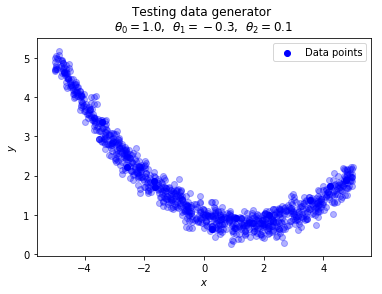

In [30]:
fig,ax = plt.subplots()
for x_data, y_data in data_ensemble:
    ax.scatter(x_data, y_data, c='b', alpha=0.3)
ax.scatter(data_ensemble[0][0], data_ensemble[0][1], c='b', alpha=1.0, label='Data points')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
title = 'Testing data generator \n' + r'$\theta_{{0}} = {}$,  $\theta_{{1}} = {}$,  $\theta_{{2}} = {}$'.format(*theta)
ax.set_title(title)
ax.legend()

## Ensemble of experiments

In [46]:
experiment_ensemble = generate_experiment_ensemble(f_truth=polynomial, theta_truth=[1.0, 2.0, -0.2],
                             model_pol_degree=2, lam=0.0,
                             y_sigma=1.0,
                             n_pts=10, n_trials=1000)

In [47]:
def sin(x, theta):
    s = theta[0]*np.sin(x*theta[1])
    return s

In [48]:
experiment_ensemble = generate_experiment_ensemble(f_truth=sin, theta_truth=[2.0, 1.0],
                             model_pol_degree=2, lam=0.0,
                             y_sigma=1.0,
                             n_pts=10, n_trials=1000)

(<matplotlib.figure.Figure at 0x7f3c5c9210f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3c5c571a58>)

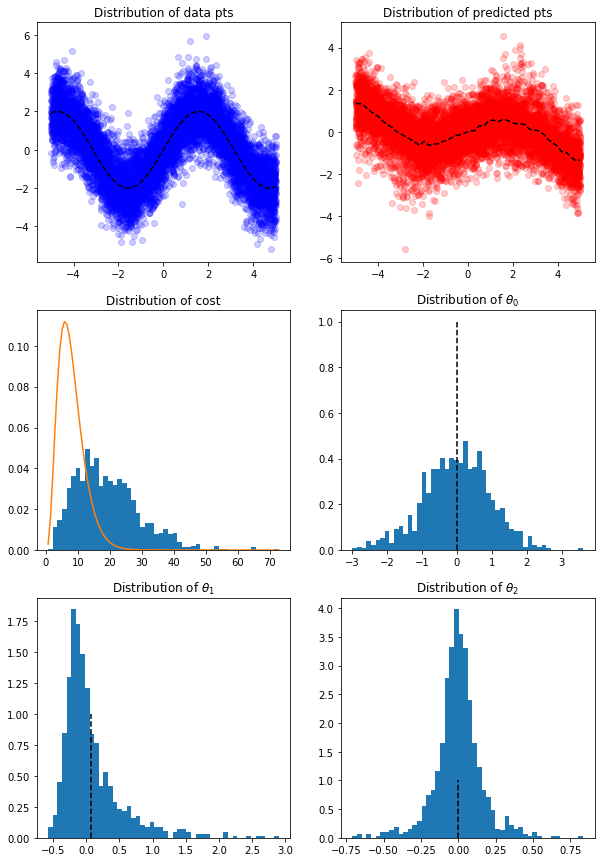

In [49]:
experiment_ensemble_dashboard(experiment_ensemble)

## Single dataset

In [50]:
dataset_index = 5

In [51]:
experiment_ensemble['theta_opt'][dataset_index]

array([-1.00164177, -0.23751878,  0.0773624 ])

In [52]:
experiment_ensemble['data'][dataset_index]

array([[-0.5790812 ,  2.82357148,  0.77151761,  3.90150537,  3.36865296,
        -1.77657025,  0.23651286,  3.6011893 , -4.42639066,  4.04099586],
       [-2.02359085,  0.14831168, -1.05815596, -0.70182781, -0.4030055 ,
        -1.83741298,  0.72619022, -1.45727564,  2.22949097, -1.7052302 ]])

(<matplotlib.figure.Figure at 0x7f3c5a2dce48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3c5a3716a0>)

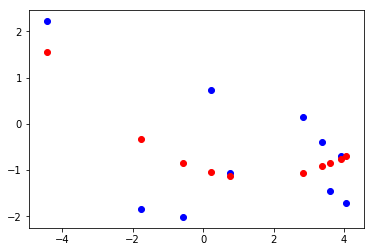

In [53]:
plot_data_and_pred_example(experiment_ensemble, dataset_index=dataset_index)